In [62]:
import scipy
import pandas as pd
import numpy as np
import astropy
import astropy.coordinates as ac
import astropy.units as u
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
import galstreams

In [64]:
mwsts = galstreams.MWStreams(verbose=False, implement_Off=False)

Initializing galstreams library from master_log... 


In [66]:
mwsts.summary

Imp    On         TrackName          Name      TrackRefs  \
TrackName                                                                   
20.0-1-M18        po  True        20.0-1-M18        20.0-1      mateu2018   
300S-F18          st  True          300S-F18          300S         fu2018   
AAU-AliqaUma-L21  st  True  AAU-AliqaUma-L21  AAU-AliqaUma         li2021   
AAU-ATLAS-L21     st  True     AAU-ATLAS-L21     AAU-ATLAS         li2021   
Acheron-G09       ep  True       Acheron-G09       Acheron  grillmair2009   
...               ..   ...               ...           ...            ...   
Turranburra-S19   st  True   Turranburra-S19   Turranburra      shipp2019   
Vid-I21           st  True           Vid-I21           Vid      ibata2021   
Wambelong-S18     ep  True     Wambelong-S18     Wambelong      shipp2018   
Willka_Yaku-S18   ep  True   Willka_Yaku-S18   Willka_Yaku      shipp2018   
Ylgr-I21          st  True          Ylgr-I21          Ylgr      ibata2021   

                       TrackRefsLatex Notes     length        ra_o      dec_o  \
TrackName                                                                       
20.0-1-M18                  Mateu2018     -  36.619756  280.225879 -41.031405   
300S-F18                       Fu2018     -  11.084050  151.800005  16.046962   
AAU-AliqaUma-L21               Li2021     -   9.677187    0.417097 -15.901759   
AAU-ATLAS-L21                  Li2021     -  23.561687    8.931901 -21.023379   
Acheron-G09             Grillmair2009     -  36.532092  230.000000  -2.000000   
...                               ...   ...        ...         ...        ...   
Turranburra-S19   Shipp2019,Shipp2018     -  13.729050   59.707970 -18.554702   
Vid-I21                     Ibata2021     -  18.115243   17.350232 -25.248735   
Wambelong-S18     Shipp2018,Shipp2019     -  14.162214   90.500000 -45.600000   
Willka_Yaku-S18   Shipp2018,Shipp2019     -   6.394108   36.100000 -64.600000   
Ylgr-I21                    Ibata2021     -  44.786315  164.418994   2.585146   

                  ...      dec_f  distance_f      ra_mid    dec_mid  \
TrackName         ...                                                 
20.0-1-M18        ... -16.281973   25.126725  298.182168 -29.913159   
300S-F18          ...  14.448969   14.350060  157.510431  15.343949   
AAU-AliqaUma-L21  ... -20.427757   24.636741    4.915075 -18.117867   
AAU-ATLAS-L21     ... -33.199331   18.525495   20.058646 -26.983189   
Acheron-G09       ...  21.000000    3.800000  244.604606  10.300419   
...               ...        ...         ...         ...        ...   
Turranburra-S19   ... -25.275911   27.500000   67.141164 -22.183041   
Vid-I21           ... -34.861329   20.394279   25.819117 -30.331205   
Wambelong-S18     ... -34.300000   15.100000   84.434473 -40.084053   
Willka_Yaku-S18   ... -58.300000   34.700000   37.366336 -61.454796   
Ylgr-I21          ... -38.981660   11.626170  172.503942 -18.321817   

                  distance_mid     ra_pole   dec_pole  InfoFlags  \
TrackName                                                          
20.0-1-M18           26.839948  235.758575  38.821881       0000   
300S-F18             15.929409  308.056470  72.509388       1101   
AAU-AliqaUma-L21     26.923444   64.503226  57.120874       1111   
AAU-ATLAS-L21        20.885277   73.360646  49.567099       1111   
Acheron-G09           3.656382  142.339428  49.453184       0000   
...                        ...         ...        ...        ...   
Turranburra-S19      27.500000  123.473122  53.283631       1010   
Vid-I21              24.642130   80.544842  44.626077       1110   
Wambelong-S18        15.100000  328.673187 -27.312855       0020   
Willka_Yaku-S18      34.700000  315.982039   4.658813       0020   
Ylgr-I21              9.509494  255.362041  20.576076       1112   

                                   DiscoveryRefs  ID  
TrackName                                             
20.0-1-M18                             Mat

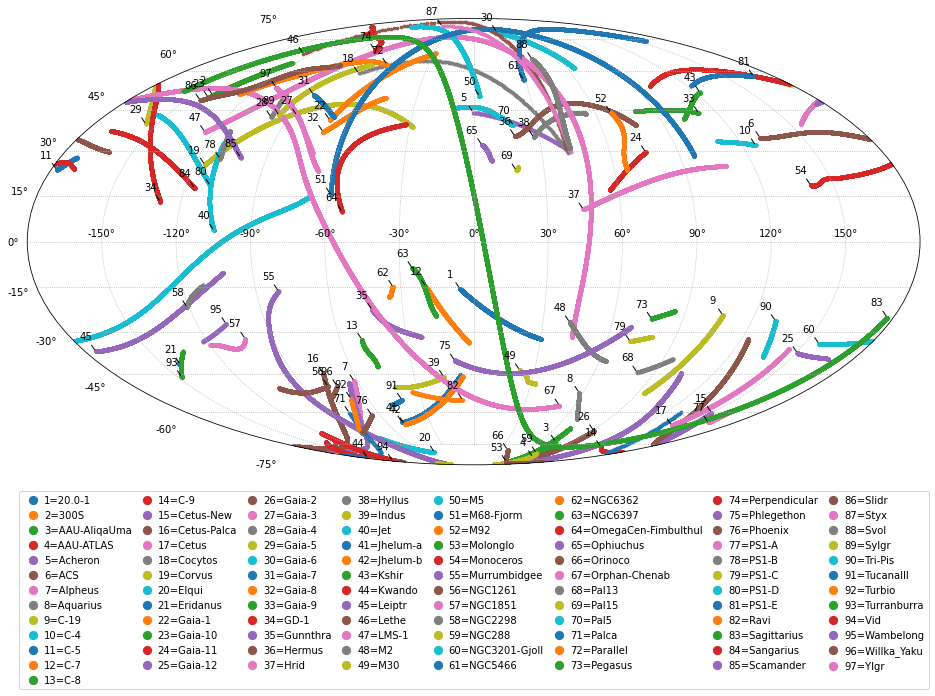

In [6]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='mollweide')

for st in mwsts.keys():
  #Plot the tracks  
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=30,
             label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))
  #Annotate at one of the end points  
  xo = mwsts[st].end_points.galactic.l.wrap_at(180*u.deg)[0].rad
  yo = mwsts[st].end_points.galactic.b[0].rad  
  ax.annotate(mwsts[st].ID, xy=(xo,yo),
              xycoords='data',
              arrowprops=dict(arrowstyle="-",color='k'),
              horizontalalignment='center', verticalalignment='center', 
              xytext=(-10,15),textcoords='offset points',
              )

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')

In [7]:
#SAME THING WITYHOUT NOTING THE NUMBER OF THE STELLAR STREAMS 
# fig = plt.figure(1,figsize=(16,11))
# ax = fig.add_subplot(111, projection='aitoff') #mollweide spherical coordinates projected flat 

# for st in mwsts.keys():
#   #Plot the tracks  
#   ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
#              mwsts[st].track.galactic.b.rad, marker='.', s=30,
#              label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))
    
# ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
#           bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
# ax.grid(ls=':')

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import Angle

# this will require installing gala, see here: http://gala.adrian.pw/en/latest/index.html
import gala.coordinates as gc
import gala.potential as gp
import gala.dynamics as gd
from gala.units import galactic
from gala.dynamics.nbody import DirectNBody
import gala.integrate as gi

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [68]:
from helpers.SimulationAnalysis import SimulationAnalysis, iterTrees
from helpers.SimulationAnalysis import readHlist

In [69]:
#Path to simulation data
path_to_data = ''

#Halo properties to load; see Section 2.4 of https://arxiv.org/abs/2008.08591 for info on Rockstar fields 
fields = ['scale','id', 'upid', 'pid', 'mvir', 'mpeak', 'rvir', 'rs', 'vmax', 'vpeak', 'x', 'y', 'z', 'vx', 'vy', 'vz',
          'M200c', 'depth_first_id','scale_of_last_MM']

#Load z = 0 halo list for Halo416_16K
halos_z0 = readHlist(path_to_data+'hlist_1.00000.list',fields=fields)
MW_analog = halos_z0[np.argmax(halos_z0['mvir'])]

subhalos_z0 = halos_z0[halos_z0['upid']==MW_analog['id']]
LMC_analog = subhalos_z0[np.argmax(subhalos_z0['mvir'])]

ind_lmc = subhalos_z0['pid']==LMC_analog['id']

#Reading in data from last week 
t = Table.read('snapshot_now.fits')

In [11]:
#Zeroing out the data 
h=0.7
subhalos_z0['x'] = (subhalos_z0['x'] - MW_analog['x'])*1000/h
subhalos_z0['y'] = (subhalos_z0['y'] - MW_analog['y'])*1000/h
subhalos_z0['z'] = (subhalos_z0['z'] - MW_analog['z'])*1000/h

In [61]:
len(subhalos_z0['x'])

14246

In [13]:
c = coord.Galactocentric(x=subhalos_z0['x']*u.kpc, y=subhalos_z0['y']*u.kpc, z=subhalos_z0['z']*u.kpc
                         , v_x=subhalos_z0['vx']*u.km/u.s, v_y=subhalos_z0['vy']*u.km/u.s, 
                         v_z=subhalos_z0['vz']*u.km/u.s)
c_eq = c.transform_to(coord.ICRS)
cgal = c_eq.transform_to(coord.Galactic)

In [14]:
cgal

<Galactic Coordinate: (l, b, distance) in (deg, deg, kpc)
    [(201.37773217,  16.44460737,  92.88798166),
     (209.97442635,   4.92976895, 111.67044834),
     ( 11.27744724, -13.3955857 , 288.26351629), ...,
     ( 80.15335782,  36.63763751,  81.70862411),
     ( 15.11626719,  -1.86194821, 298.32109635),
     ( 61.53118824,  25.87675799, 277.55118283)]
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( 1.00503457, 0.92922254,  425.16716087),
     ( 0.27466584, 0.8047166 ,  172.12231262),
     (-0.3047845 , 0.229825  , -329.79714177), ...,
     (-0.68378045, 0.90413677,  -74.67551774),
     (-0.32485467, 0.2504785 , -255.19092821),
     (-0.20018496, 0.30744849,  -53.65779692)]>

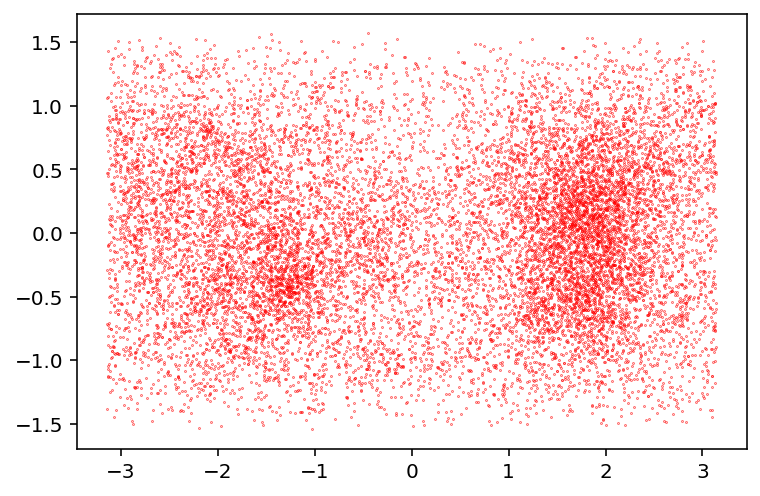

In [15]:
plot(c_eq.ra.wrap_at(180*u.deg).rad, c_eq.dec.rad, '.r', ms=0.5)

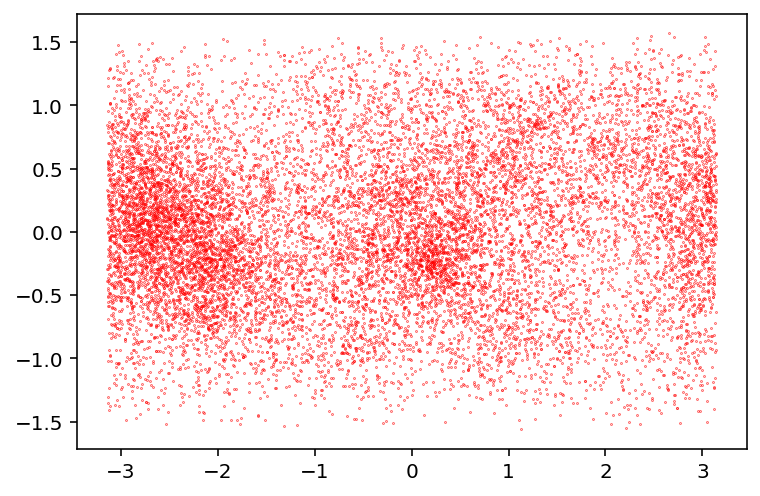

In [16]:
#GALACTIC
plot(cgal.l.wrap_at(180*u.deg).rad, cgal.b.rad, '.r', ms=0.5)

In [17]:
#FINDING COORDINATES FOR LMC
c_LMC = coord.Galactocentric(x=LMC_analog['x']*u.kpc, y=LMC_analog['y']*u.kpc, z=LMC_analog['z']*u.kpc)
c_eq_LMC = c_LMC.transform_to(coord.ICRS)
cgal_LMC = c_eq_LMC.transform_to(coord.Galactic)

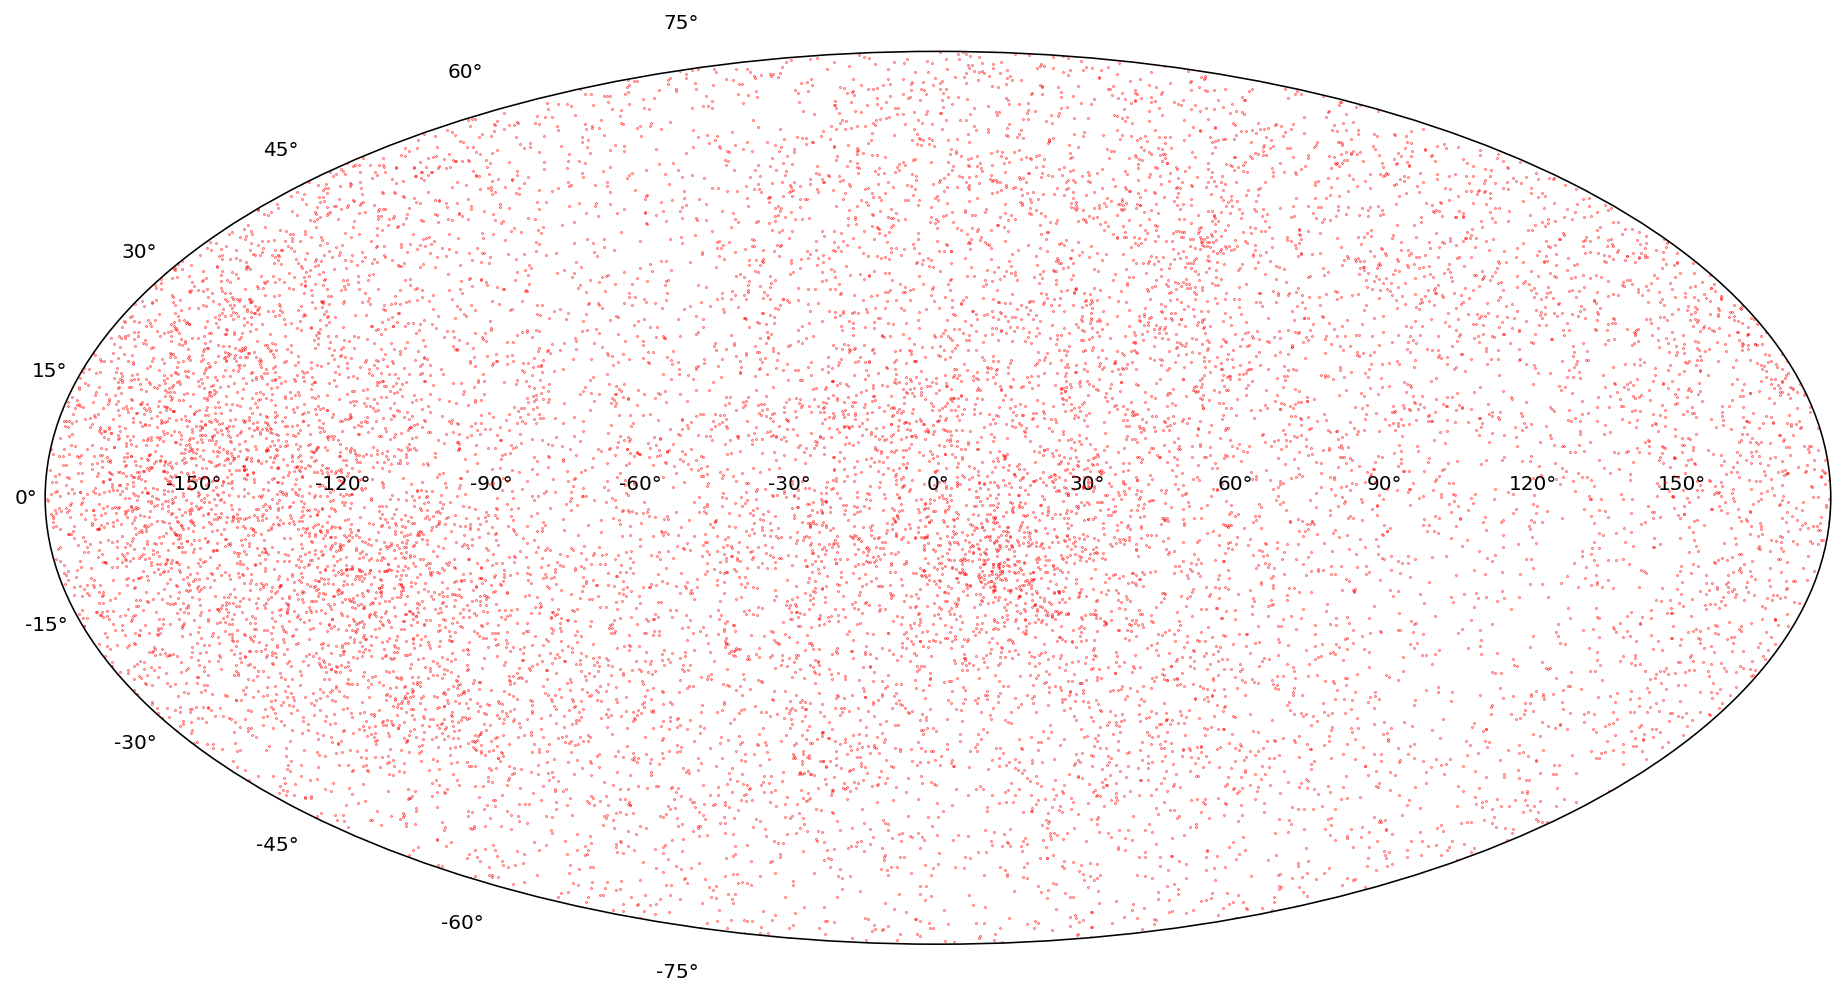

In [18]:
#PLOT WITH JUST SUBHALOS 
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='aitoff') #mollweide spherical coordinates projected flat 

plot(cgal.l.wrap_at(180*u.deg).rad, cgal.b.rad, '.r', ms=0.5)


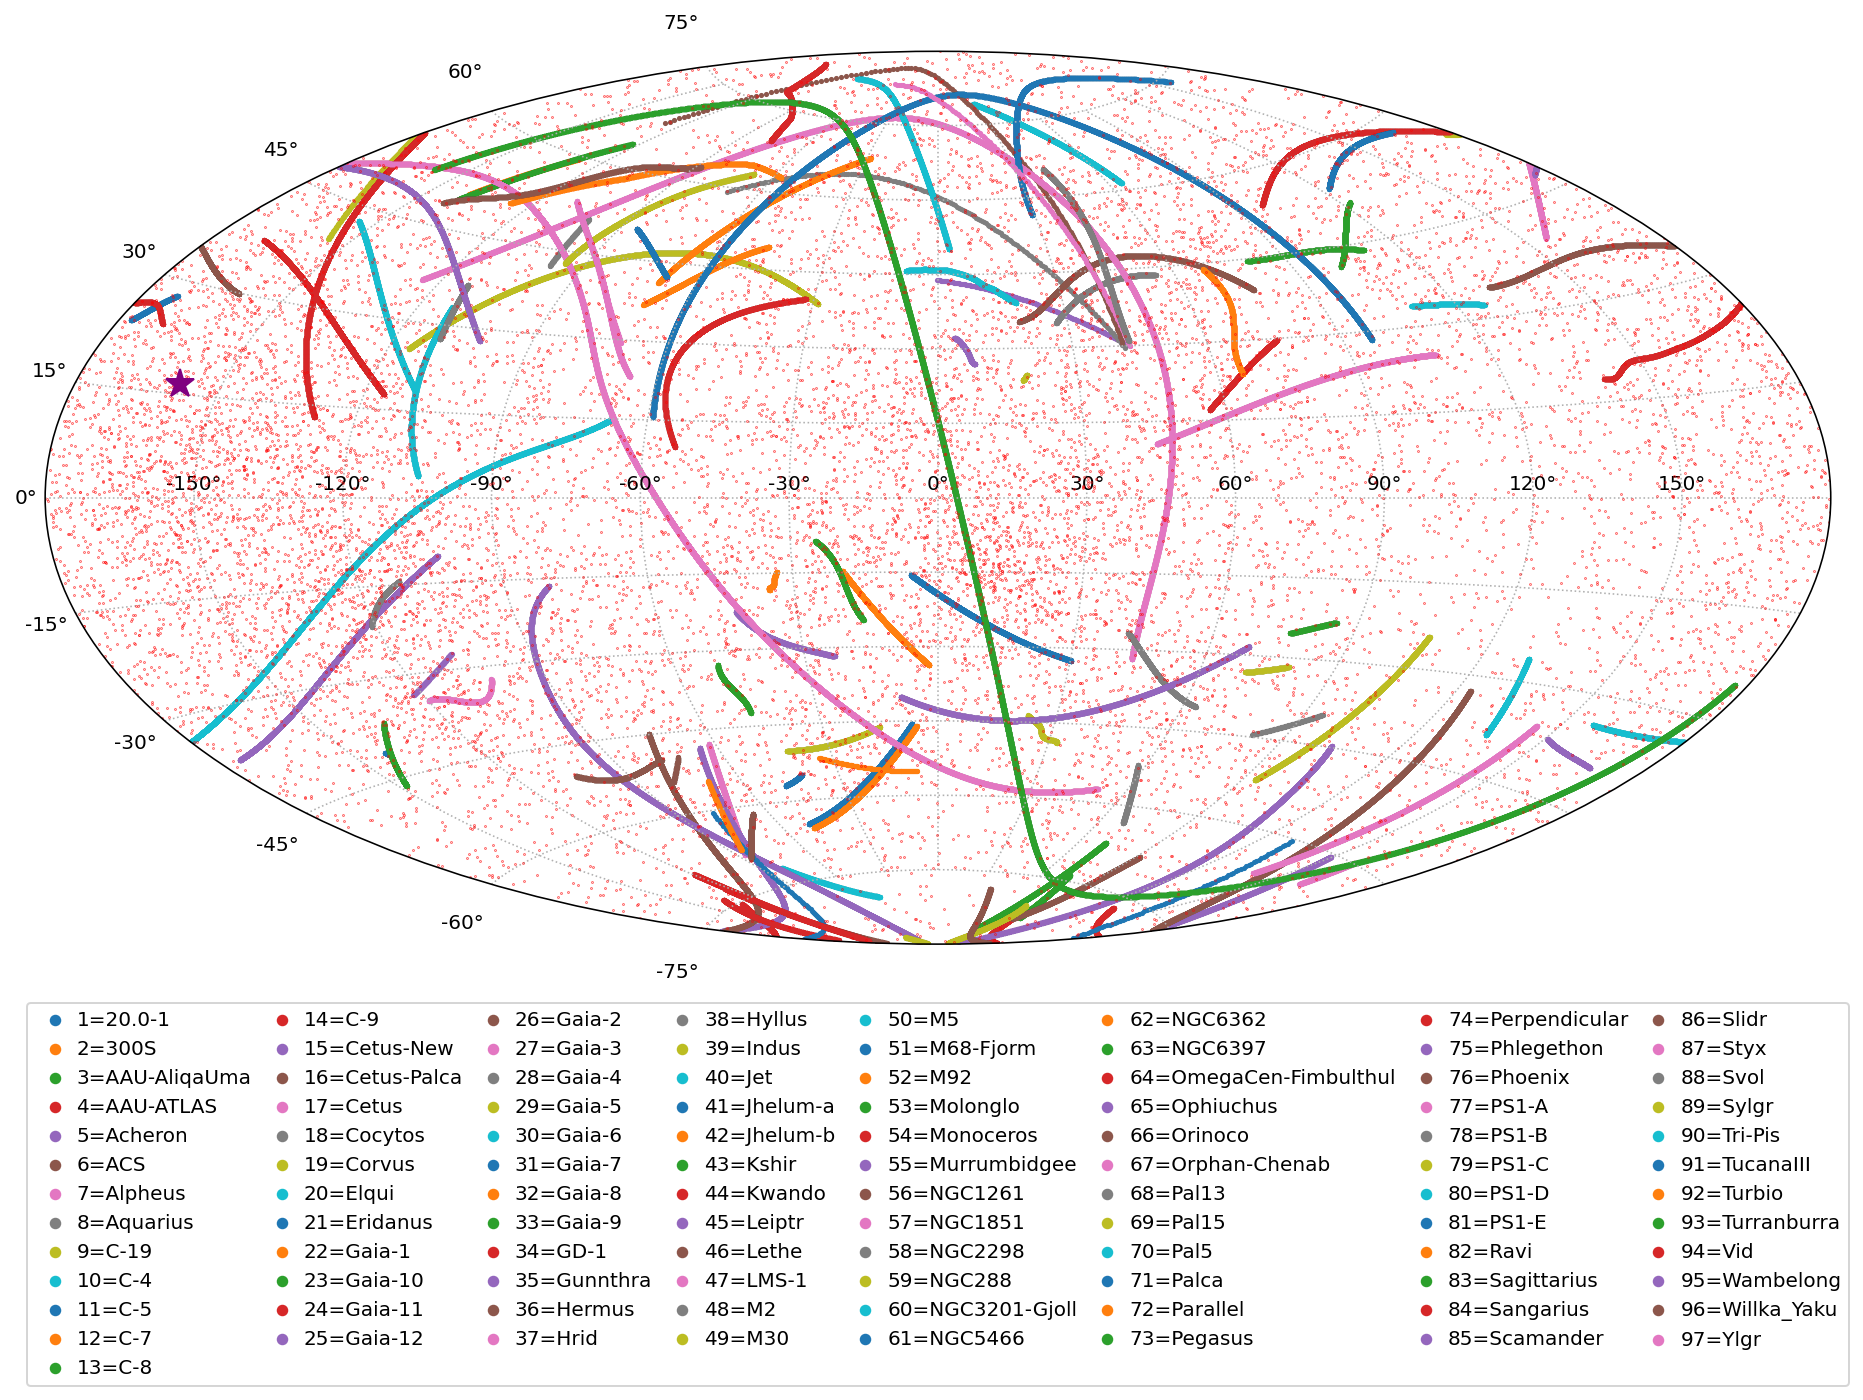

In [19]:
#PLOT WITH SUBHALOS, ALL STELLAR STREMS, & LMC
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='aitoff') #mollweide spherical coordinates projected flat 

for st in mwsts.keys():
  #Plot the tracks  
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=10,
             label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))

plot(cgal.l.wrap_at(180*u.deg).rad, cgal.b.rad, '.r', ms=0.5)
plot(cgal_LMC.l.wrap_at(180*u.deg).rad, cgal_LMC.b.rad, '*', color='purple', ms=15)

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')

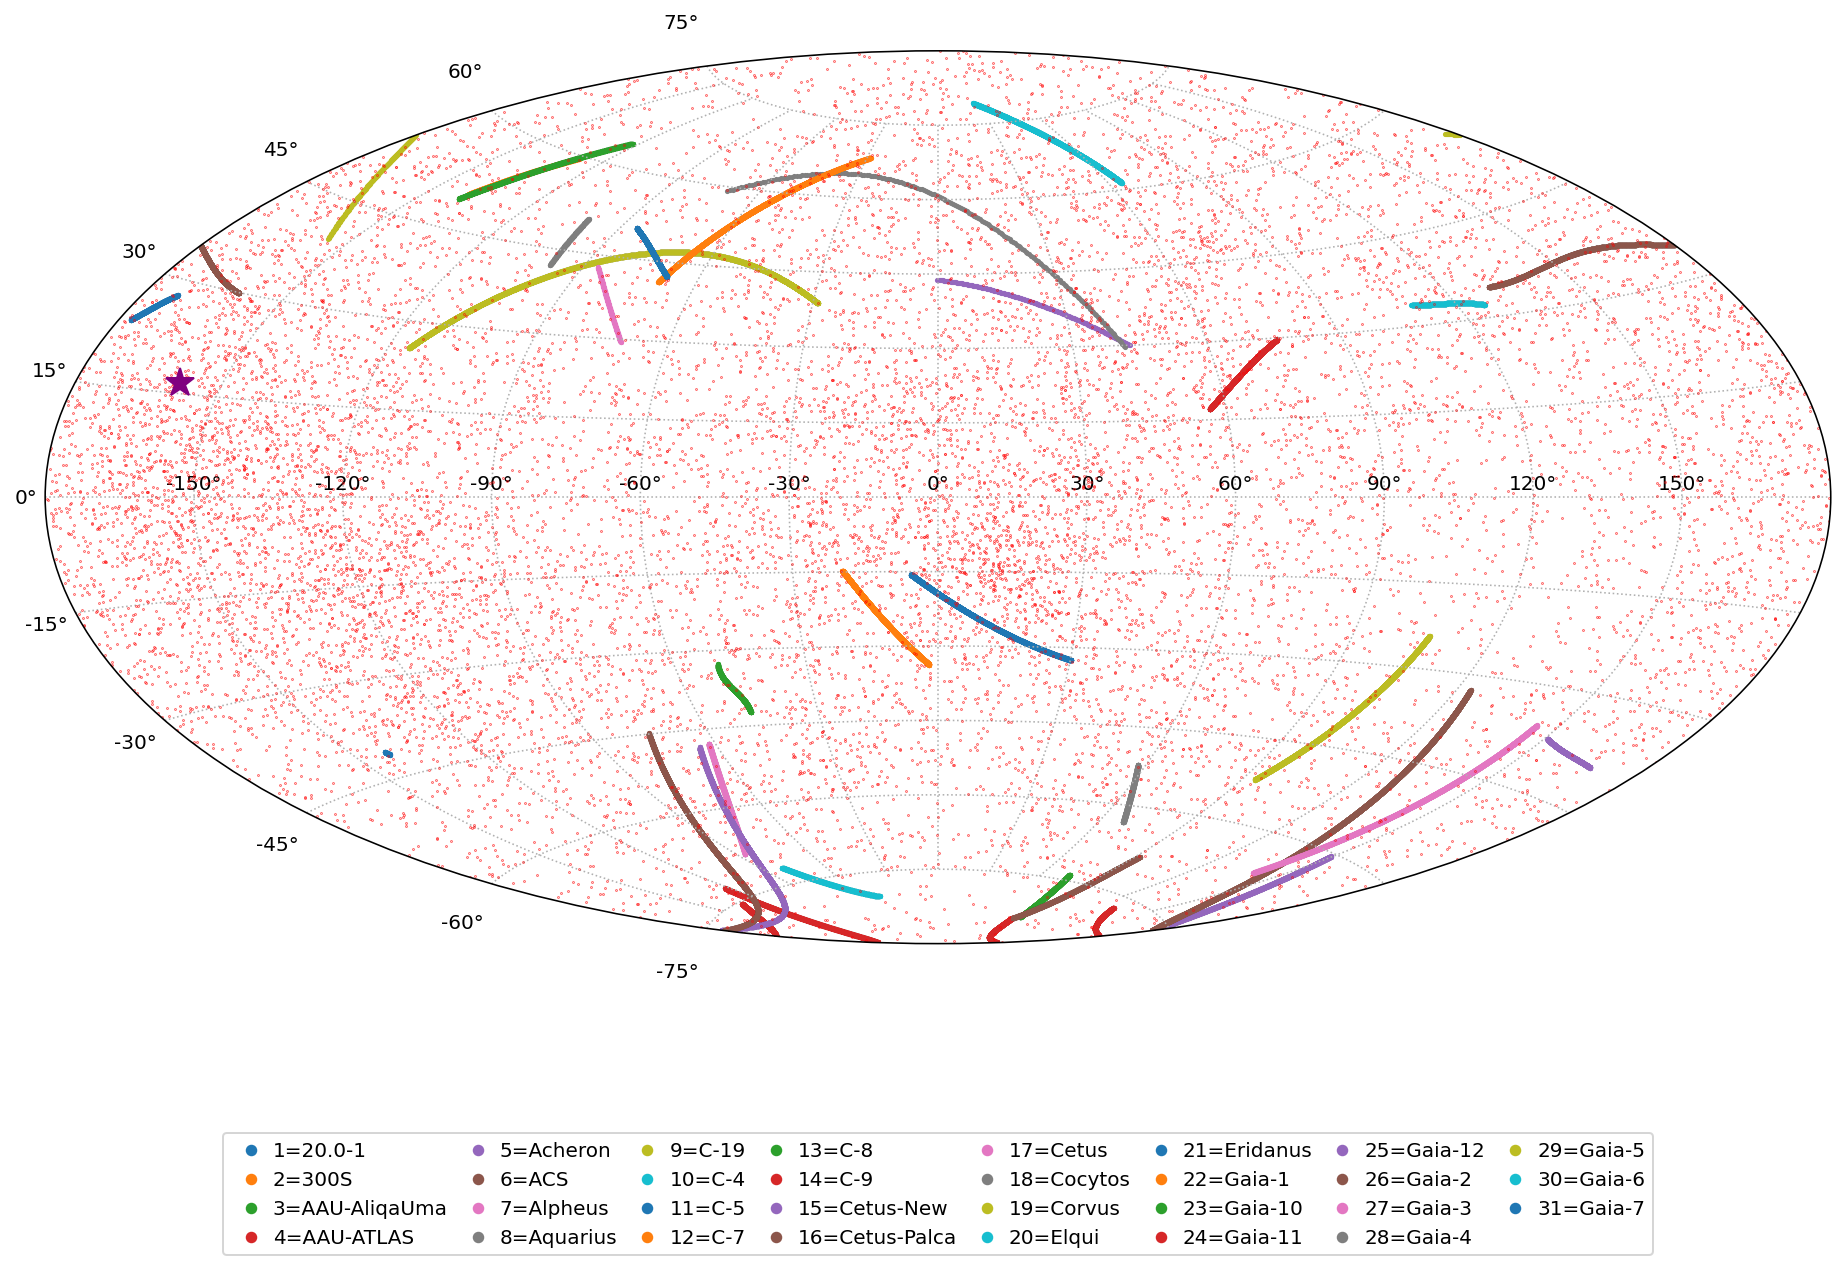

In [20]:
#SAME PLOT AS BEFORE BUT WITH JUST THE FIRST 30 STREAMS 
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='aitoff') #mollweide spherical coordinates projected flat 

for st in list(mwsts.keys())[:31]:
  #Plot the tracks  
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=10,
             label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))
plot(cgal.l.wrap_at(180*u.deg).rad, cgal.b.rad, '.r', ms=0.5)
plot(cgal_LMC.l.wrap_at(180*u.deg).rad, cgal_LMC.b.rad, '*', color='purple', ms=15)

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')

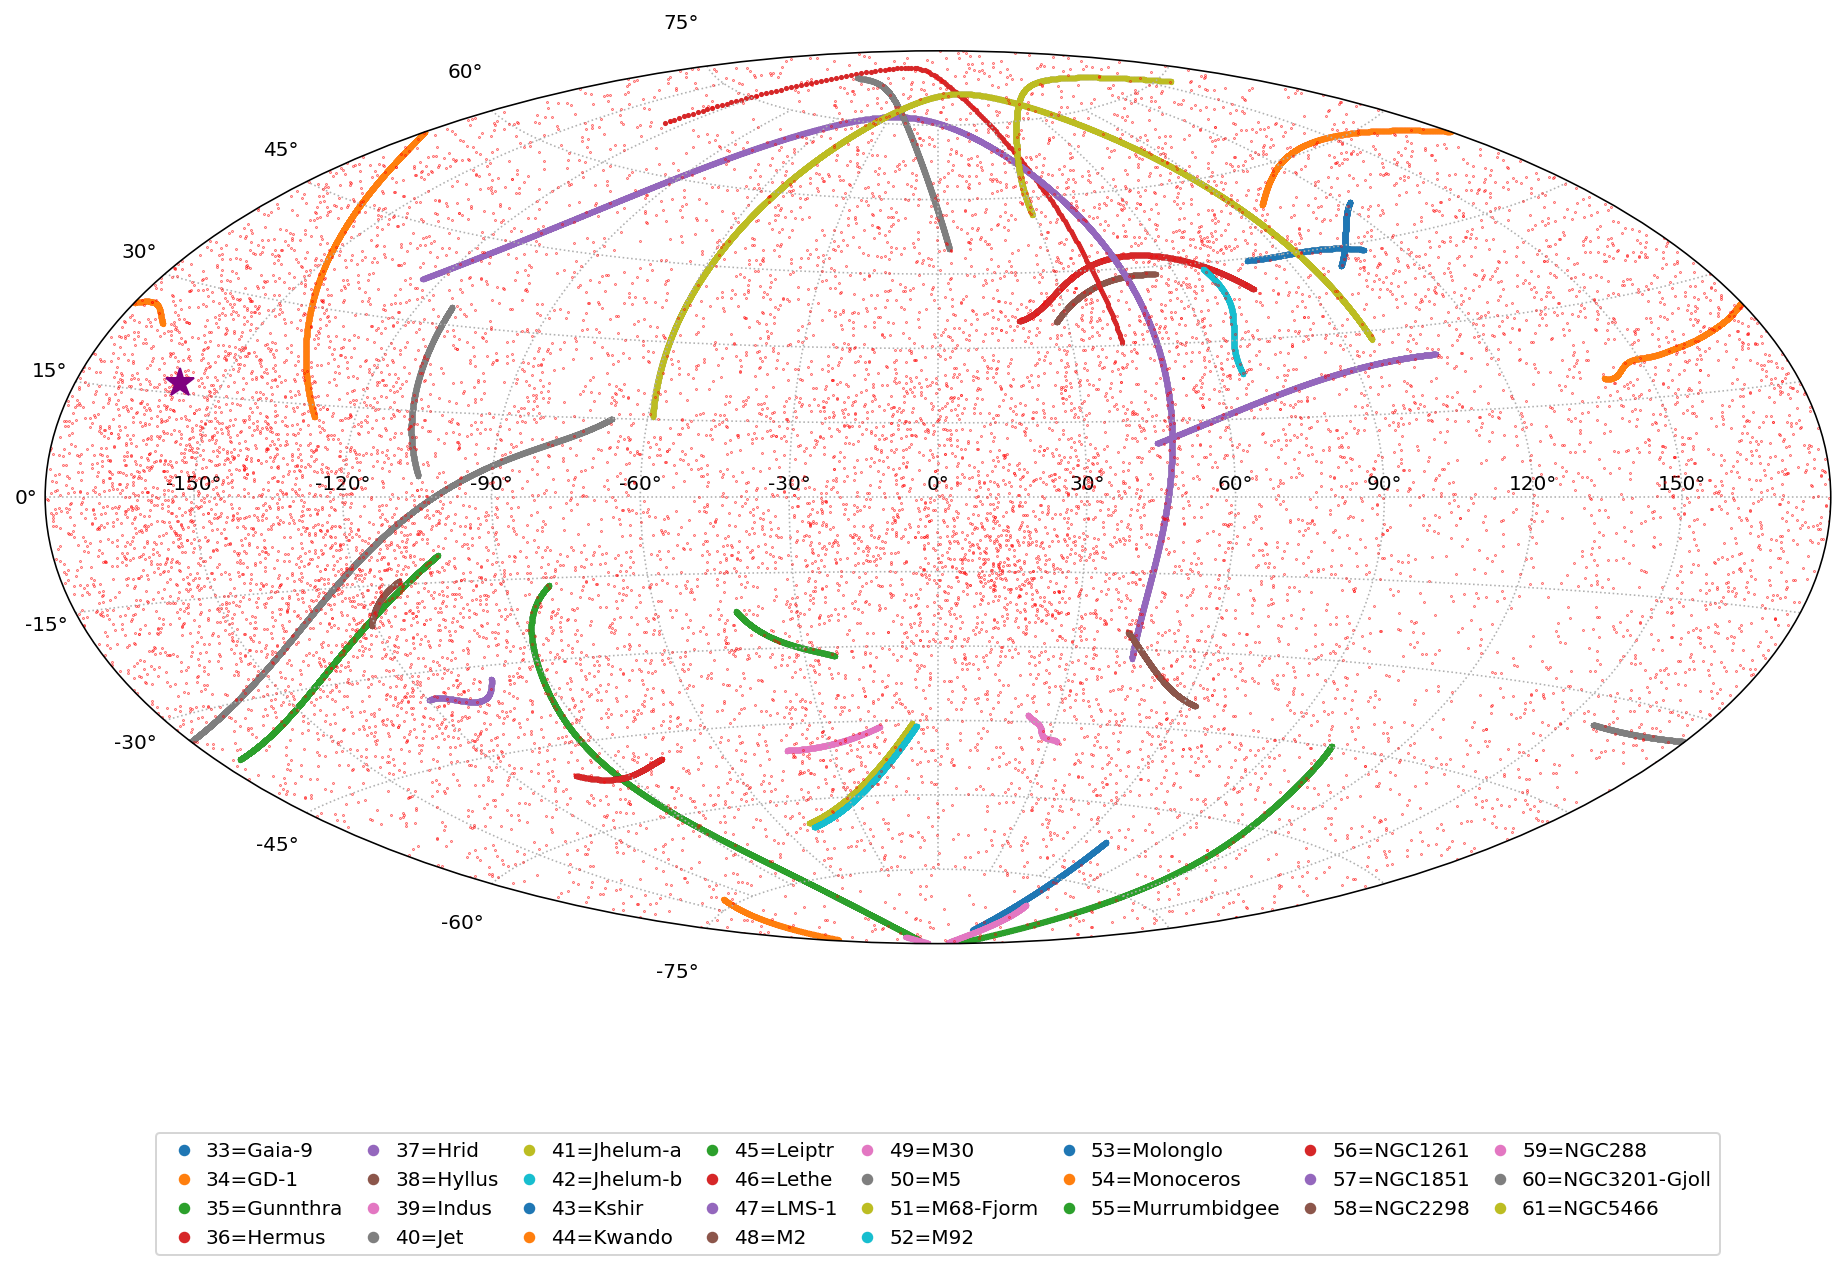

In [21]:
#SAME PLOT AS BEFORE BUT WITH THE STREAMS 31-60
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='aitoff') #mollweide spherical coordinates projected flat 

for st in list(mwsts.keys())[32:61]:
  #Plot the tracks  
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=10,
             label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))
plot(cgal.l.wrap_at(180*u.deg).rad, cgal.b.rad, '.r', ms=0.5)
plot(cgal_LMC.l.wrap_at(180*u.deg).rad, cgal_LMC.b.rad, '*', color='purple', ms=15)

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')

In [22]:
#SUBHALOS DATA
t = np.array(t)
c_ss = coord.Galactocentric(x=t['x']*u.kpc, y=t['y']*u.kpc, z=t['z']*u.kpc)
c_eq_ss = c_ss.transform_to(coord.ICRS)
cgal_ss = c_eq_ss.transform_to(coord.Galactic)

In [23]:
#MW DATA
c_ss_MW = coord.Galactocentric(x=0*np.array(len(t['x']))*u.kpc, y=0*np.array(len(t['x']))*u.kpc, 
                               z=0*np.array(len(t['x']))*u.kpc)
c_eq_ss_MW = c_ss_MW.transform_to(coord.ICRS)
cgal_ss_MW = c_eq_ss_MW.transform_to(coord.Galactic)

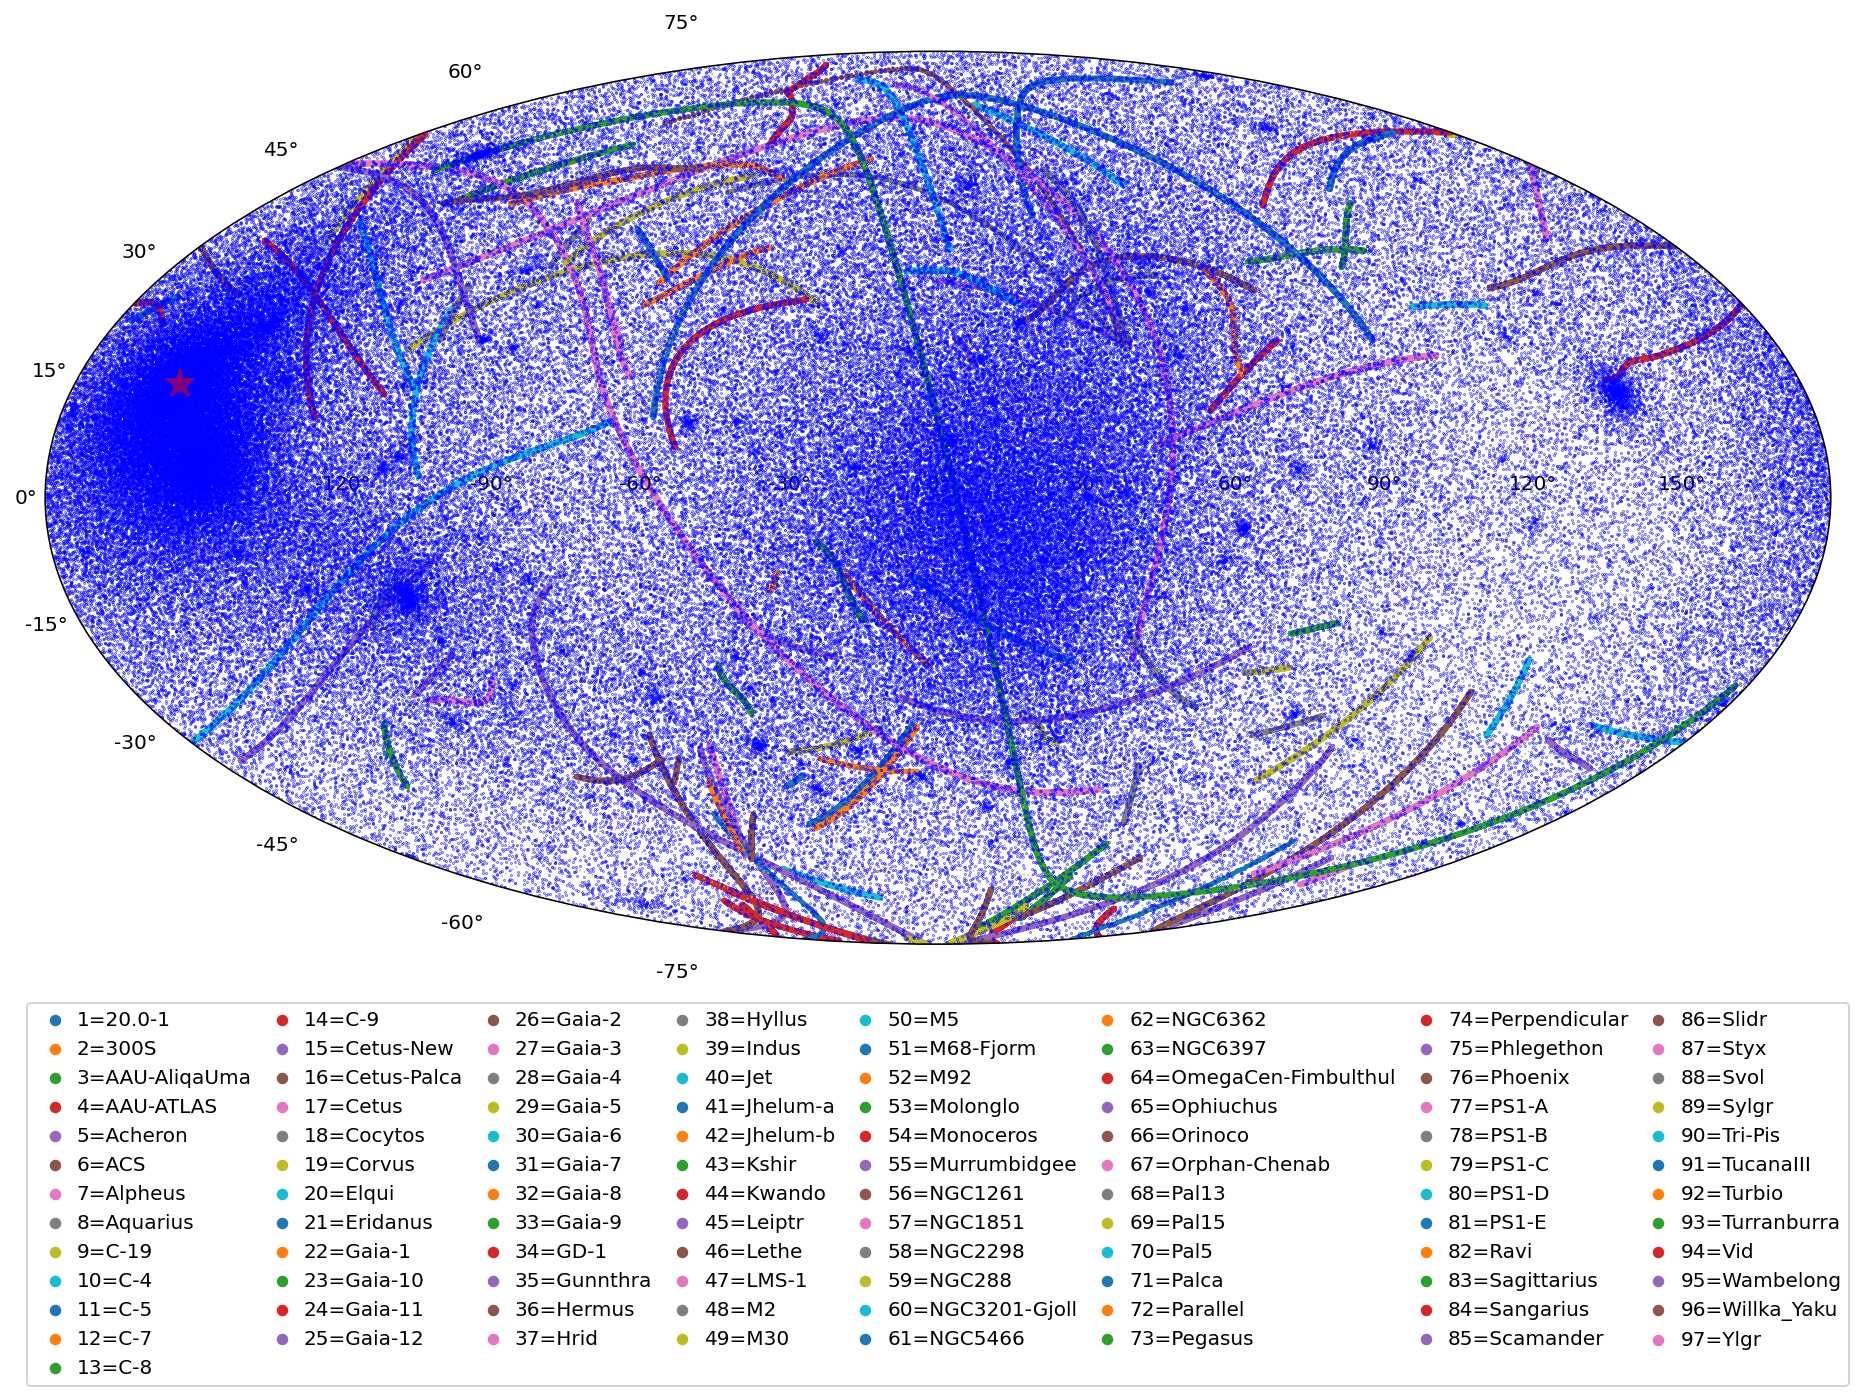

In [24]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='aitoff') #mollweide spherical coordinates projected flat 

for st in mwsts.keys():
  #Plot the tracks  
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=10,
             label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))

plot(cgal_ss.l.wrap_at(180*u.deg).rad, cgal_ss.b.rad, '.b', ms=0.5)
plot(cgal_LMC.l.wrap_at(180*u.deg).rad, cgal_LMC.b.rad, '*', color='purple', ms=15)

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')

In [ ]:
ind_massive = (subhalos_z0['mvir'] > 10**7)


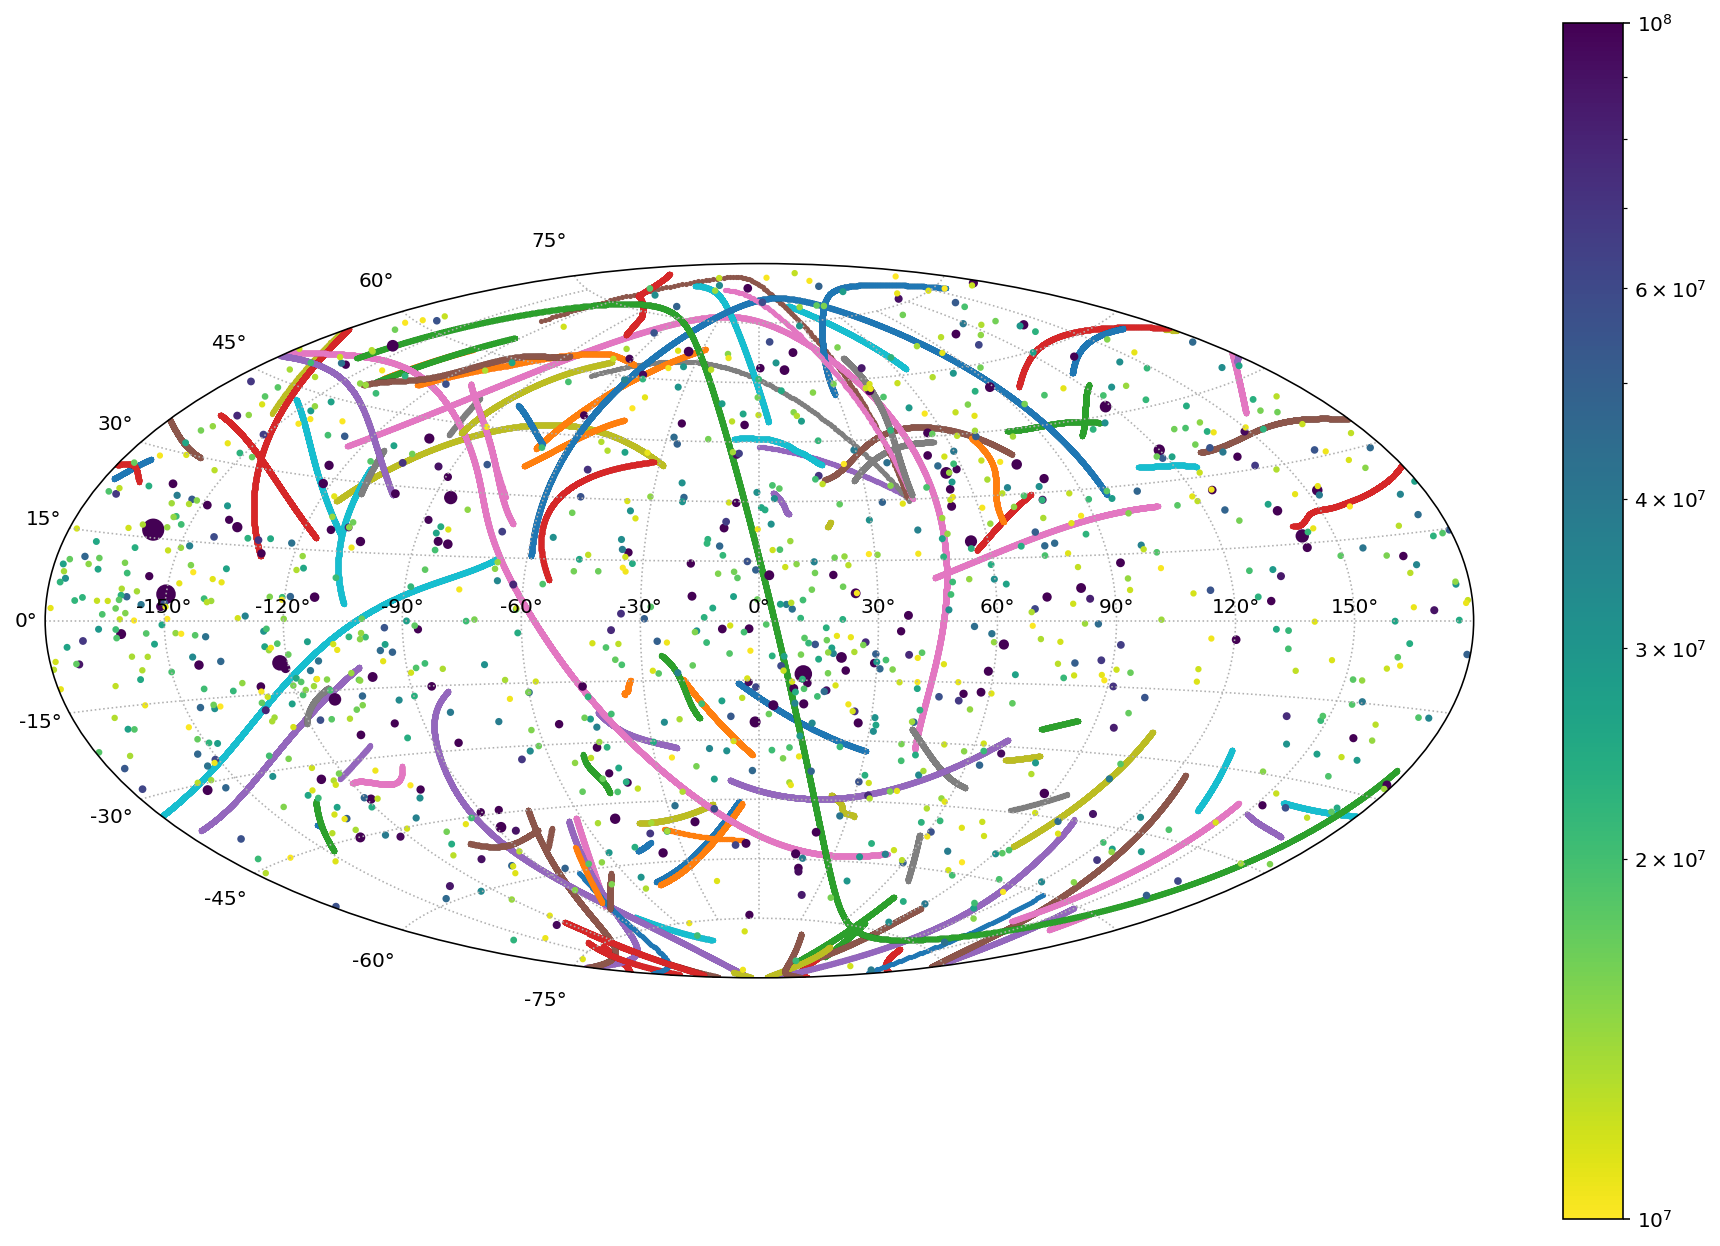

In [43]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='aitoff') #mollweide spherical coordinates projected flat 
ind_massive = (subhalos_z0['mvir'] > 10**7) #& (subhalos_z0['mvir'] < 10**8)

for st in mwsts.keys():
  #Plot the tracks  
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=10,
             label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))

#plot(cgal.l.wrap_at(180*u.deg).rad, cgal.b.rad, '.r', ms=1)
#plot(cgal_ss.l.wrap_at(180*u.deg).rad, cgal_ss.b.rad, '.b', ms=0.5, alpha=0.2, zorder=0)
#plot(cgal_LMC.l.wrap_at(180*u.deg).rad, cgal_LMC.b.rad, '*', color='yellow', mec='black', ms=15)
#plot(cgal_ss_MW.l.wrap_at(180*u.deg).rad, cgal_ss_MW.b.rad, '*', color='black', ms=15)
sc = ax.scatter(cgal.l.wrap_at(180*u.deg).rad[ind_massive], cgal.b.rad[ind_massive], 
                c=subhalos_z0['mvir'][ind_massive], 
                norm=mpl.colors.LogNorm(vmin=(10**7), vmax=(10**8)), s=subhalos_z0['rvir'][ind_massive], zorder=1,
               cmap='viridis_r')
plt.colorbar(sc)

#ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          #bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')

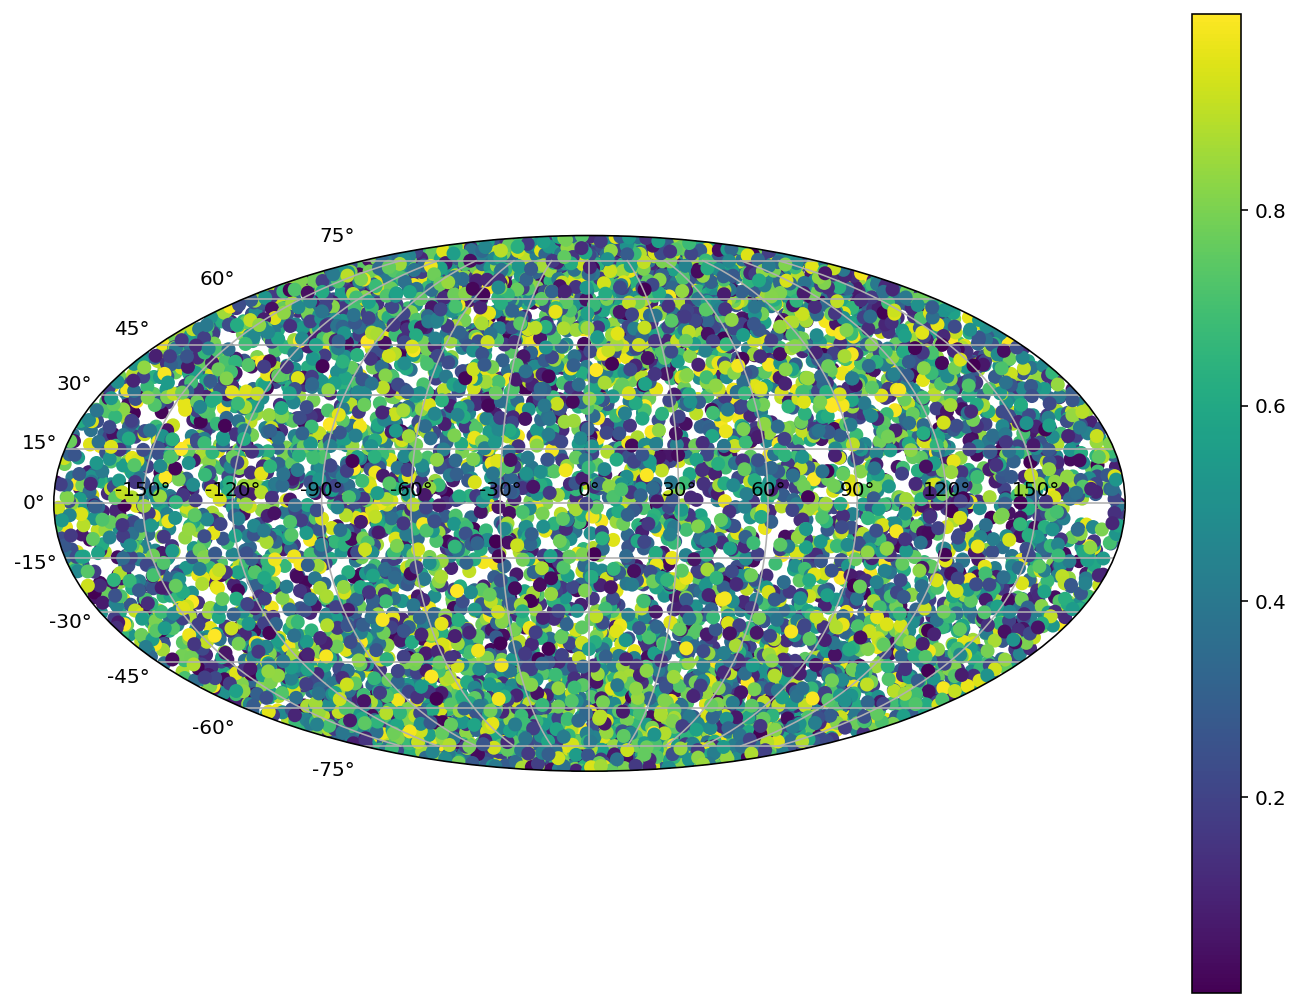

In [26]:
lll=np.random.uniform(0,360,10000)
bbb=np.random.uniform(-90,90,10000)
amplitudes=np.random.uniform(0,1,10000)

l_axis_name ='latitude l (deg)'
b_axis_name = 'longitude b (deg)'

for i in range(len(lll)):
    if lll[i]>180:
        lll[i] -= 360
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(True)

sc = ax.scatter(np.array(lll)*np.pi/180., np.array(bbb)*np.pi/180., c=amplitudes)
plt.colorbar(sc)

plt.show()

In [58]:
for st in mwsts.keys():
    i += 1
    if st == 'Elqui-S19':
        print(i)

119


In [59]:
119-20

99